<a href="https://colab.research.google.com/github/miaerdene/bdi-project/blob/main/BDIFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [297]:
if 'google.colab' in str(get_ipython()):
    !pip install plotly==5.3.1

In [298]:
import pandas as pd
import numpy as np
import seaborn as sb
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)

# **Chosen Dataset: Netflix Movies and TV Shows**

Yoyoyo, who likes Netflix and loves binging their favorite shows? 

Let's use this opportunity to have fun while also practicing data visualization! 

This dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc. 

In [299]:
df = pd.read_csv('https://github.com/miaerdene/bdi-project/blob/main/netflix_titles.csv?raw=true')
df_backup = df.copy()
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Let's see the number of rows and columns of this dataset. 

In [300]:
num_rows = df.shape[0]
num_cols = df.shape[1]

print(f'There are {num_rows} rows and {num_cols} columns in the dataset.')

There are 8807 rows and 12 columns in the dataset.


Let's check the data types of each column and number of non-missing rows.

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


I want to know what the end of the data looks like! 

In [302]:
df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


Let us check if there are columns with missing values. 

In [303]:
for i in df.columns: 
    null_percentage = df[i].isna().sum() / len(df) * 100 
    if null_percentage > 0:
      print("{} has null percentage of {}%". format(i, round(null_percentage,2)))

director has null percentage of 29.91%
cast has null percentage of 9.37%
country has null percentage of 9.44%
date_added has null percentage of 0.11%
rating has null percentage of 0.05%
duration has null percentage of 0.03%


In [304]:
df = df.dropna( how='any',subset=['cast', 'director'])

So, as you can see, these five columns have missing values. Some greater than the other. Director has missing values in almost 30% of the data! 

I want to replace these blank values with 'No Data' string. 

In [305]:
# Replace

df['country'].replace(np.nan, 'United States', inplace = True)

# Drop duplicates

df.dropna(inplace = True)

df.drop_duplicates(inplace = True)


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 2 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5696 non-null   object
 1   type          5696 non-null   object
 2   title         5696 non-null   object
 3   director      5696 non-null   object
 4   cast          5696 non-null   object
 5   country       5696 non-null   object
 6   date_added    5696 non-null   object
 7   release_year  5696 non-null   int64 
 8   rating        5696 non-null   object
 9   duration      5696 non-null   object
 10  listed_in     5696 non-null   object
 11  description   5696 non-null   object
dtypes: int64(1), object(11)
memory usage: 578.5+ KB


In [307]:
df = df.rename(columns={"listed_in":"Genre"})
df['Genre'] = df['Genre'].apply(lambda x: x.split(",")[0])
df['Genre'].head()

2              Crime TV Shows
5                   TV Dramas
6    Children & Family Movies
7                      Dramas
8            British TV Shows
Name: Genre, dtype: object

Checking date string

In [308]:
str(df['date_added'].dtype)

'object'

Let's fix the date. 

In [309]:
#Parse date with a new column

df['date_added_parsed'] = pd.to_datetime(df['date_added'])

#Drop start_date column inplace

df.drop(columns = ['date_added'], inplace = True)

df.head(5)

,show_id,type,title,director,cast,country,release_year,rating,duration,Genre,description,date_added_parsed
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021-09-24
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021,TV-MA,1 Season,TV Dramas,The arrival of a charismatic young priest brin...,2021-09-24
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021-09-24
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s...",2021-09-24
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,British TV Shows,A talented batch of amateur bakers face off in...,2021-09-24


In [310]:
df.sample(5)

,show_id,type,title,director,cast,country,release_year,rating,duration,Genre,description,date_added_parsed
1103,s1104,Movie,Air Strike,Xiao Feng,"Bruce Willis, Liu Ye, Song Seung-heon, William...",China,2018,R,97 min,Action & Adventure,The residents of Chongqing try to survive Japa...,2021-04-02
4165,s4166,Movie,Animas,"Laura Alvea, José Ortuño","Clare Durant, Iván Pellicer, Luis Bermejo, Liz...","Spain, Belgium",2018,TV-MA,88 min,Horror Movies,A teen's eerie visions become increasingly fre...,2019-01-25
8274,s8275,Movie,The Detained,Blair Hayes,"Alex Frnka, Sarah Davenport, Henry Zaga, Coy S...",United States,2017,TV-14,85 min,Horror Movies,Five high school students serving Saturday det...,2019-02-15
886,s887,TV Show,The Mystic River,Uzodinma Okpechi,"Jide Kosoko, Dele Odule, Lota Chukwu, Ben Toui...",United States,2020,TV-14,1 Season,International TV Shows,As pregnant women vanish in a remote Nigerian ...,2021-05-14
6540,s6541,Movie,Crash,Paul Haggis,"Sandra Bullock, Don Cheadle, Matt Dillon, Jenn...","United States, Germany",2004,R,112 min,Dramas,"In post-Sept. 11 Los Angeles, tensions erupt w...",2019-10-01


Let's try to understand the data in its general form. 

Let's sort df by release year and date_added_parsed without changing df. 

In [311]:
#Filtering
df_sort_year_release_date = df.sort_values(['release_year'], ascending = False)
df_sort_year_release_date

,show_id,type,title,director,cast,country,release_year,rating,duration,Genre,description,date_added_parsed
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021-09-24
766,s767,Movie,Alan Saldaña: Locked Up,Alex Díaz,Alan Saldaña,Mexico,2021,TV-MA,49 min,Stand-Up Comedy,"Mexican comedian Alan Saldaña is back, poking ...",2021-06-03
764,s765,Movie,Trippin' with the Kandasamys,Jayan Moodley,"Jailoshini Naidoo, Maeshni Naicker, Madhushan ...",South Africa,2021,TV-14,94 min,Comedies,"To rekindle their marriages, best friends-turn...",2021-06-04
762,s763,Movie,Sweet & Sour,Lee Kae-byeok,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,2021,TV-14,103 min,Comedies,Faced with real-world opportunities and challe...,2021-06-04
758,s759,TV Show,Feel Good,Ally Pankiw,"Mae Martin, Charlotte Ritchie, Lisa Kudrow, So...",United Kingdom,2021,TV-MA,2 Seasons,Romantic TV Shows,Stand-up comic Mae Martin navigates a passiona...,2021-06-04
...,...,...,...,...,...,...,...,...,...,...,...,...
8587,s8588,Movie,Thunderbolt,"William Wyler, John Sturges","James Stewart, Lloyd Bridges",United States,1947,TV-PG,42 min,Classic Movies,A P-47 Thunderbolt squadron is shown in prepar...,2017-03-31
7294,s7295,Movie,Let There Be Light,John Huston,Walter Huston,United States,1946,TV-PG,58 min,Classic Movies,Some returning combat veterans suffer scars th...,2017-03-31
7219,s7220,Movie,Know Your Enemy - Japan,"Frank Capra, Joris Ivens","Walter Huston, Dana Andrews",United States,1945,TV-14,63 min,Classic Movies,Though culturally insensitive by modern standa...,2017-03-31
8640,s8641,Movie,Tunisian Victory,"Frank Capra, John Huston, Hugh Stewart, Roy Bo...",Burgess Meredith,"United States, United Kingdom",1944,TV-14,76 min,Classic Movies,British and American troops join forces to lib...,2017-03-31


In [312]:
df['year_added'] = df['date_added_parsed'].dt.year
df['month_added'] = df['date_added_parsed'].dt.month
df['day_added'] = df['date_added_parsed'].dt.day
df.sample(5)

,show_id,type,title,director,cast,country,release_year,rating,duration,Genre,description,date_added_parsed,year_added,month_added,day_added
7354,s7355,Movie,"Love, Rosie",Christian Ditter,"Lily Collins, Sam Claflin, Christian Cooke, Ja...","Germany, United Kingdom",2014,R,103 min,Comedies,"Over the years, as they come and go in each ot...",2019-11-20,2019,11,20
1484,s1485,Movie,Cops and Robbers,"Arnon Manor, Timothy Ware-Hill",Timothy Ware-Hill,United States,2020,PG-13,8 min,Dramas,Animation and activism unite in this multimedi...,2020-12-28,2020,12,28
2939,s2940,Movie,Horse Girl,Jeff Baena,"Alison Brie, Debby Ryan, Paul Reiser, John Rey...",United States,2020,R,104 min,Dramas,"A sweet misfit with a fondness for crafts, hor...",2020-02-07,2020,2,7
2725,s2726,Movie,Gumrah,Mahesh Bhatt,"Sanjay Dutt, Sridevi, Anupam Kher, Rahul Roy, ...",India,1993,TV-14,149 min,Action & Adventure,Jailed for drug trafficking while searching fo...,2020-04-01,2020,4,1
4928,s4929,Movie,Come Sunday,Joshua Marston,"Chiwetel Ejiofor, Martin Sheen, Danny Glover, ...",United States,2018,TV-14,105 min,Dramas,A crisis of faith sets renowned fundamentalist...,2018-04-13,2018,4,13


In [313]:
df_monthly = df[df['country'] == 'United States']
df_monthly = df.groupby(['year_added','month_added'], as_index=False).agg({
    'date_added_parsed' : 'count',
}).rename(columns ={
    'date_added_parsed' : 'num_releases'
})
df_monthly = df_monthly.sort_values(['month_added'], ascending = True)
df_monthly.head(10)

,year_added,month_added,num_releases
0,2008,1,1
58,2018,1,90
34,2016,1,7
70,2019,1,105
82,2020,1,153
15,2014,1,2
94,2021,1,95
46,2017,1,50
95,2021,2,60
35,2016,2,8


Compare 2020 and 2021 movie releases

In [314]:
num_2021_movies = df[df['year_added'] == 2021].shape[0]
num_2020_movies = df[df['year_added'] == 2020].shape[0]
num_2019_movies = df[df['year_added'] == 2019].shape[0]

print(f'There were {num_2021_movies} movies in 2021.')
print(f'There were {num_2020_movies} movies in 2020.')
print(f'There were {num_2019_movies} movies in 2019.')
print(f'The number of movies decreased by {(num_2021_movies - num_2019_movies) / num_2021_movies * 100:.1f}%.')

There were 962 movies in 2021.
There were 1248 movies in 2020.
There were 1323 movies in 2019.
The number of movies decreased by -37.5%.


Sunburst chart of monthly releases

In [315]:

fig = px.sunburst(
    df_monthly[df_monthly['year_added'] >= 2019],
    path = ['year_added', 'month_added'],
    values = 'num_releases',
    title = 'Sunburst Chart of Monthly Movie Releases on Netflix',
    width = 600,
    height = 600,
)
fig.show()

In [341]:
fig = px.scatter_3d(
    df[df['year_added'] >= 2019],
    title='July 4th 5-6 PM trips 3D scatter plots',
    x='day_added',
    y='month_added',
    z='year_added',
    color='year_added',
    template='plotly_dark',
    width=800,
    height=800
)
fig.show()

Find countries with highest number of releases. 

In [316]:
df_countries = pd.DataFrame(df.country.value_counts().reset_index().values, columns=["country", "count"])
df_countries = df_countries.sort_values(by = 'count', ascending = False)
df_countries.head(10)

,country,count
0,United States,2210
1,India,875
2,United Kingdom,183
3,Canada,107
4,Spain,91
5,Egypt,90
6,Nigeria,88
7,Japan,83
8,Turkey,79
9,Indonesia,76


In [317]:
df_countries["count"] = df_countries["count"].astype(str).astype(int)

In [318]:
fig = px.bar(df_countries.nlargest(15, ['count']), x="count", y="country", orientation='h')
fig.show()

Finding countries with highest rating

In [319]:
highest_rating=df[0:10]
fig =px.sunburst(
    highest_rating,
    path=['country'])
fig.show()


Find out which Genre had the highest rating.

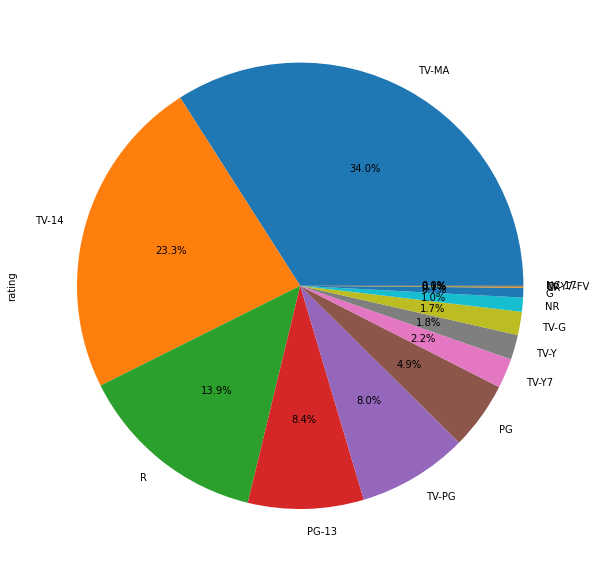

In [320]:
fig = df['rating'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,25)) 

Monthly releases in 2029 and 2020 in US. 

In [321]:
fig = px.bar(
    df_monthly[df_monthly['year_added'] >= 2019],
    title = 'Monthly number of releases in 2019 and 2020 in US',
    x = 'month_added',
    y = 'num_releases',
    facet_col='year_added',
    width=1000,
    height=500,
    template='plotly_dark',
    color='num_releases',
    color_continuous_scale=['White', 'Yellow']
)
fig.show()

Differentiate Movie and TV Show 

In [322]:
movie_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

In [323]:
movie_df.head(5)

,show_id,type,title,director,cast,country,release_year,rating,duration,Genre,description,date_added_parsed,year_added,month_added,day_added
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021-09-24,2021,9,24
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s...",2021-09-24,2021,9,24
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104 min,Comedies,A woman adjusting to life after a loss contend...,2021-09-24,2021,9,24
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,TV-MA,127 min,Dramas,After most of her family is murdered in a terr...,2021-09-23,2021,9,23
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",United States,2021,TV-PG,91 min,Children & Family Movies,When the clever but socially-awkward Tetê join...,2021-09-22,2021,9,22


In [324]:

fig = px.bar(df, x = 'type', barmode = 'group', color = 'type')
fig.show()

Use bar graphs to show the rating scale of movies

In [325]:
df = df.groupby(['rating']).sum().reset_index(level=[0])
fig = px.bar(movie_df, x='rating', color = 'rating')
fig.show()

Use bar charts to scale the rating of TV shows 

In [326]:
fig = px.bar(tv_df, x='rating', color = 'rating')
fig.show()

In [327]:
import warnings
warnings.filterwarnings("ignore")

Top 15 TV Shows with most number of seasons

In [328]:
tv_df['duration']=tv_df['duration'].str.replace(' Season','')
tv_df['duration']=tv_df['duration'].str.replace('s','')
tv_df['duration']=tv_df['duration'].astype(str).astype(int)
tv_df['duration']

2       1
5       1
8       9
11      1
47      1
       ..
8172    1
8214    1
8293    1
8302    1
8599    3
Name: duration, Length: 178, dtype: int64

In [329]:
columns=['title','duration']
tv_shows = tv_df[columns]

In [330]:
tv_shows = tv_shows.sort_values(by='duration',ascending=False)
tv_shows
top15 = tv_shows[0:15]
top15

,title,duration
2423,Supernatural,15
3541,Naruto,9
8,The Great British Baking Show,9
1998,Call the Midwife,9
2947,Arrow,8
7896,Royal Pains,8
380,The Flash,7
3653,Comedians in Cars Getting Coffee,6
1173,Men on a Mission,6
6742,Father Brown,6


<Figure size 720x432 with 0 Axes>

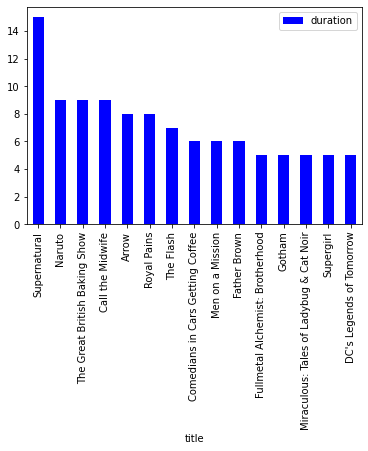

In [331]:
plt.figure(figsize=(10,6))
top15.plot(kind='bar',x='title',y='duration', color='blue')

Top 10 directors with most number of movies

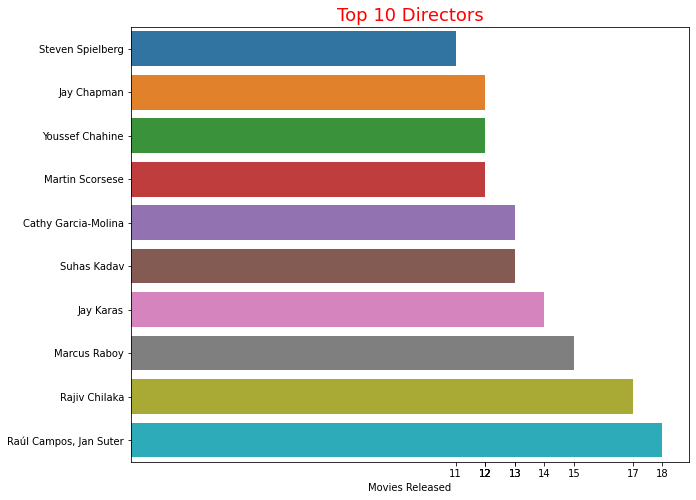

In [332]:
plt.figure(figsize=(10,8))
sb.barplot(y= movie_df.director.value_counts()[:10].sort_values().index, x=movie_df.director.value_counts()[:10].sort_values().values);
plt.title('Top 10 Directors', color='red', fontsize=18)
plt.xticks(movie_df.director.value_counts()[:10].sort_values().values);
plt.xlabel('Movies Released');

Convert duration to integer 

In [333]:
movie_df['duration']=movie_df['duration'].str.replace(' min','')
movie_df['duration']=movie_df['duration'].astype(str).astype(int)
movie_df['duration']

6        91
7       125
9       104
12      127
13       91
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 5518, dtype: int64

In [334]:
columns=['title','duration']
tv_shows = tv_df[columns]

In [335]:
tv_shows = tv_shows.sort_values(by='duration',ascending=False)
tv_shows.head(20)

,title,duration
2423,Supernatural,15
3541,Naruto,9
8,The Great British Baking Show,9
1998,Call the Midwife,9
2947,Arrow,8
7896,Royal Pains,8
380,The Flash,7
3653,Comedians in Cars Getting Coffee,6
1173,Men on a Mission,6
6742,Father Brown,6


In [351]:
tv_df = tv_shows.merge(tv_df, left_on = 'title',right_on = 'title')
tv_df

,title,duration_x,show_id,type,director,cast,country,release_year,rating,duration_y,Genre,description,date_added_parsed,year_added,month_added,day_added
0,Supernatural,15,s2424,TV Show,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada",2019,TV-14,15,Classic & Cult TV,"Siblings Dean and Sam crisscross the country, ...",2020-06-05,2020,6,5
1,Naruto,9,s3542,TV Show,Hayato Date,"Junko Takeuchi, Chie Nakamura, Noriaki Sugiyam...",Japan,2006,TV-14,9,Anime Series,"Guided by the spirit demon within him, orphane...",2019-09-01,2019,9,1
2,The Great British Baking Show,9,s9,TV Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9,British TV Shows,A talented batch of amateur bakers face off in...,2021-09-24,2021,9,24
3,Call the Midwife,9,s1999,TV Show,Philippa Lowthorpe,"Vanessa Redgrave, Bryony Hannah, Helen George,...",United Kingdom,2020,TV-MA,9,British TV Shows,This period drama set in impoverished East Lon...,2020-09-15,2020,9,15
4,Arrow,8,s2948,TV Show,James Bamford,"Stephen Amell, Katie Cassidy, David Ramsey, Wi...",United States,2019,TV-14,8,Crime TV Shows,"Based on DC Comics' Green Arrow, an affluent p...",2020-02-05,2020,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,Almost Happy,1,s2566,TV Show,Hernán Guerschuny,"Sebastián Wainraich, Natalie Pérez, Santiago K...",Argentina,2020,TV-MA,1,International TV Shows,"Sebastián is a radio show host of modest fame,...",2020-05-02,2020,5,2
174,The Forest of Love: Deep Cut,1,s2603,TV Show,Sion Sono,"Kippei Shiina, Shinnosuke Mitsushima, Kyooko H...",Japan,2020,TV-MA,1,Crime TV Shows,Nothing's as it seems when a charismatic conma...,2020-04-30,2020,4,30
175,The Victims' Game,1,s2604,TV Show,"David Chuang, Chen Kuan-chung","Joseph Chang, Hsu Wei-ning, Jason Wang, Ruby L...",Taiwan,2020,TV-MA,1,Crime TV Shows,After discovering his estranged daughter's lin...,2020-04-30,2020,4,30
176,Middleditch & Schwartz,1,s2660,TV Show,Ryan Polito,"Thomas Middleditch, Ben Schwartz",United States,2020,TV-MA,1,TV Comedies,Comedy duo Thomas Middleditch and Ben Schwartz...,2020-04-21,2020,4,21


In [353]:
fig = px.treemap(
    tv_df,
    path=['country', 'Genre'], 
    values = 'duration_x',
    title = 'Country and Genre of TV show scaled by duration time',
    height = 600
)
fig.show()